In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm 
%matplotlib inline
from numpy import ma

<img = "D3Q19">
<img src="D3Q19.png",width=500,height=100>


# Flujo de Poiseuille, corte transversal del fluido tridimensional

CPU times: user 582 ms, sys: 9.5 ms, total: 592 ms
Wall time: 602 ms


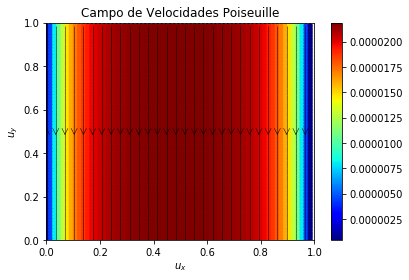

In [105]:
%%time

ux = np.loadtxt('vx.dat', unpack = True)
uy = np.loadtxt('vy.dat', unpack = True)
#uz = np.transpose(np.loadtxt('vz.dat', unpack = True))
x = np.loadtxt('x.dat', unpack = True)
y = np.loadtxt('y.dat', unpack = True)
#z = np.transpose(np.loadtxt('z.dat', unpack = True))
rho = np.loadtxt('rho.dat', unpack = True)

np.shape(ux)

plt.figure()
plt.title("Campo de Velocidades Poiseuille")
plt.xlabel("$u_{x}$")
plt.ylabel("$u_{y}$")
M = np.hypot(ux, uy)
plt.xlim(0,1)
plt.ylim(0,1)
Q = plt.quiver(x, y, ux,uy, M , cmap=plt.cm.jet, width=0.022,scale=1/0.1)
plt.colorbar()
plt.streamplot(x, y, ux, uy, color="k", linewidth=0.5,density=1.0, arrowstyle='->', arrowsize=1.5)

# Verificación de la densidad en el arreglo

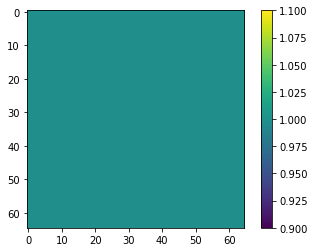

In [106]:
plt.imshow(rho)
plt.colorbar()


## Graficas de a plano por 3D



Se intenta hacer cortes para ver la evolución en cada capa del fluido, plot de prueba

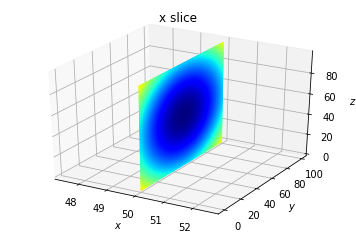

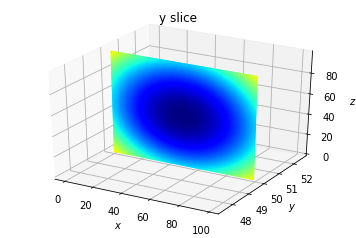

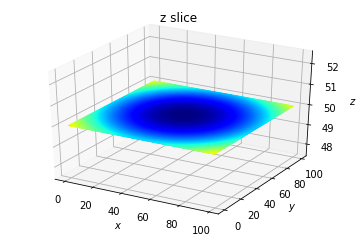

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_array_slices(array):
    min_val = array.min()
    max_val = array.max()
    n_x, n_y, n_z = array.shape
    colormap = plt.cm.jet

    x_cut = array[n_x//2,:,:]
    Y, Z = np.mgrid[0:n_y, 0:n_z]
    X = n_x//2 * np.ones((n_y, n_z))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((x_cut-min_val)/(max_val-min_val)), shade=False)
    ax.set_title("x slice")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")

    y_cut = array[:,n_y//2,:]
    X, Z = np.mgrid[0:n_x, 0:n_z]
    Y = n_y//2 * np.ones((n_x, n_z))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((y_cut-min_val)/(max_val-min_val)), shade=False)
    ax.set_title("y slice")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")

    z_cut = array[:,:,n_z//2]
    X, Y = np.mgrid[0:n_x, 0:n_y]
    Z = n_z//2 * np.ones((n_x, n_y))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((z_cut-min_val)/(max_val-min_val)), shade=False)
    ax.set_title("z slice")
    
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")
    
    plt.show()


n_pts = 100
r_square = (np.mgrid[-1:1:1j*n_pts, -1:1:1j*n_pts, -1:1:1j*n_pts]**2).sum(0)
plot_3D_array_slices(r_square)

Unificación de cortes transversales 

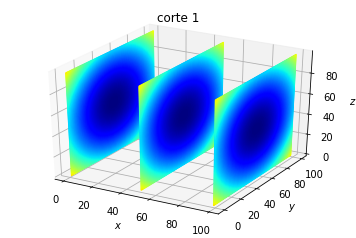

In [100]:
def plot_3D_array_slices(array):
    min_val = array.min()
    max_val = array.max()
    n_x, n_y, n_z = array.shape
    colormap = plt.cm.jet

    x_cut = array[n_x//2,:,:]
    Y, Z = np.mgrid[0:n_y, 0:n_z]
    X = n_x//2 * np.ones((n_y, n_z)) +49
    X1 = n_x//2 * np.ones((n_y, n_z)) 
    X2 = n_x//2 * np.ones((n_y, n_z)) -49
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((x_cut-min_val)/(max_val-min_val)), shade=False)
    ax.plot_surface(X1, Y, Z, rstride=1, cstride=1, facecolors=colormap((x_cut-min_val)/(max_val-min_val)), shade=False)
    ax.plot_surface(X2, Y, Z, rstride=1, cstride=1, facecolors=colormap((x_cut-min_val)/(max_val-min_val)), shade=False)
    ax.set_title("corte 1")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")
    
    plt.show()


n_pts = 100
r_square = (np.mgrid[-1:1:1j*n_pts, -1:1:1j*n_pts, -1:1:1j*n_pts]**2).sum(0)
plot_3D_array_slices(r_square)

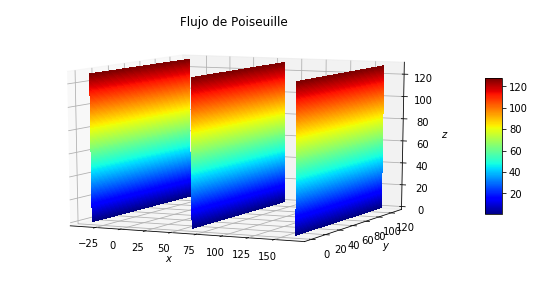

In [101]:
n_pts = 129
array = (np.mgrid[-1:1:1j*n_pts, -1:1:1j*n_pts, -1:1:1j*n_pts]**2).sum(0)


min_val = array.min()
max_val = array.max()
n_x, n_y, n_z = array.shape
colormap = plt.cm.jet

#x_cut = array[n_x//2,:,:]
Y, Z = np.mgrid[0:n_y, 0:n_z]
X = n_x//2 * np.ones((n_y, n_z)) +100
X1 = n_x//2 * np.ones((n_y, n_z)) 
X2 = n_x//2 * np.ones((n_y, n_z)) -100
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap = plt.cm.jet,linewidth =0, antialiased = False)
ax.plot_surface(X1, Y, Z, rstride=1, cstride=1, cmap = plt.cm.jet, antialiased = False)
ax.plot_surface(X2, Y, Z, rstride=1, cstride=1, cmap = plt.cm.jet, antialiased = False)
ax.set_title("Flujo de Poiseuille")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.view_init(elev = 10, azim= -65)
fig.colorbar(p, shrink=0.5, aspect=8)

plt.show()







